In [34]:
##ScrapeMSData
##Written by Rebecca Rapf
##June 15, 2021

###Read in csv's of MS files and export the useful bits for loading into Igor

##import relevant libraries
import pandas as pd
import numpy as np
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
#import csv


##Parameters to be changed for each analysis##
FilePath = "/Users/timmo/Documents/RAPFLAB/code/MS" ##currently local only, will change to read from google drive
OutFolder = "Processed"
FileType = "csv" #pick from "xlsx" or "csv"
XLabel="x"
YLabel="y"
#Surfactant = "myristic_300mMKCl" #name of surfactant and/or conditions
#StockConcSame = "yes" #"yes" or "no" if same concentration was used for each run


##Set file path to where data is being held locally
os.chdir(FilePath)
print(os.getcwd())


C:\Users\timmo\Documents\RAPFLAB\code\MS


In [39]:
files = sorted(glob.glob("*"+FileType))
files.sort(key=os.path.getmtime)
print(files)

num_files = len(files)

#AllFiles = pd.DataFrame()

YAxis=[] #empty list containing all values of the Y-Axis for each file read
XAxis=[] #empty list containing all values of the X-Axis for each file read
LegendNames=[]
OutputName= "Mass Spec Graph"

for entry in range(len(files)):
    name = files[entry]
    outname = name[:-(len(FileType)+4)]
    if len(outname)>28:
        print("skipping "+outname)
        entry+=1
    #print(len(outname))
    #print(outname)
    if FileType == "csv":
        CurrFile = pd.read_csv(files[entry],skiprows=1)
        
        #########################
        #print(CurrFile.columns)
        import re
        FullSplit = re.split("[_|.]", name)
        LegendNames.append((FullSplit[1]))
        IndFile = pd.DataFrame(columns = ["mz_"+outname,"c_"+outname])
        IndFile["mz_"+outname] = CurrFile['X(Thompsons)']
        IndFile["c_"+outname] = CurrFile['Y(Counts)']
        XAxis.append(CurrFile["X(Thompsons)"]) #appends the "A_cm2" column to the XAxis dataframe
        YAxis.append(CurrFile["Y(Counts)"]) #appends the "P1[mN/m]" column to the YAxis dataframe. Will be plotted later
        IndFile.to_csv(OutFolder+"/"+outname+"_Processed.csv")
        #CurrFile = CurrFile.rename(columns={CurrFile.columns[3]: "A_cm2"})
        #print(CurrFile.columns)

    elif FileType == "xlsx":
        print("change to csv")


['210525OO200uMag_50_spectra.csv', '210525OOA200uMagain_spectra.csv', '210525OO75uMag_50_spectra.csv', '210525OOA75uMagain_spectra.csv', 'blank3_50_spectra.csv', '210525OOApre_50uMagain_spectra.csv', '210525OO54uMag_50_spectra_empty.csv', '210525OO25uMag_50_spectra.csv', '210525OOApost_50uM_50_10uL_spectra.csv', '210525OOApost_50uM_50_50uL_spectra.csv', 'blank2_50_spec.csv', '210525OOA25uMagain_spectra.csv', '210525OOApost_50uM_50_5uL_spectra.csv', '210525OOApost_50uMnew_50_spectra.csv', '210525OOApost_50uM_50_30uL_spectra.csv', 'blank1_25_spectra.csv', '210525OO3uMag_50_spectra.csv', '210525OOApost_50uM_50_20uL_spectra.csv', '210525OOApost_50uMagain_spectra.csv', '210525OO10uMag_50_spectra.csv', '210525OOA10uMagain_spectra.csv', '210525OOA3uMagain_spectra.csv']
skipping 210525OOApost_50uM_50_10uL_spec
skipping 210525OOApost_50uM_50_50uL_spec
skipping 210525OOApost_50uM_50_5uL_spec
skipping 210525OOApost_50uMnew_50_spec
skipping 210525OOApost_50uM_50_30uL_spec
skipping 210525OOApost_50

In [40]:
####################Figure style --> will be used for plotting
def FigStyle(): #axis will be shared
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    plt.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.spines.right'] = True
    mpl.rcParams['axes.spines.top'] = True
    #plt.axis(xmin=25,xmax=250)
    
    mpl.rcParams['xtick.top']=False
    mpl.rcParams['ytick.right']=False
    ax.tick_params(direction='inout')
    ax.tick_params('both', length=6, width=2, which='major')
    ax.legend(LegendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.01, 1)) #creates legend and specifies location + formatting
   
    plt.xlabel(XLabel, size=15) #x axis label
    plt.ylabel(YLabel, size=17) #y axis label
    
    #ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.02, 1)) #creates legend and specifies location + formatting
    
    
    plt.savefig(OutFolder+"/"+OutputName+".png", dpi=300, transparent=False)
    plt.show() #shows the final plot
    

    #sets basic formatting for our plot


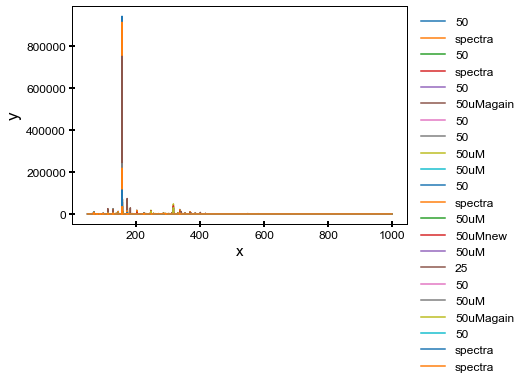

In [41]:

fig, ax = plt.subplots(sharex =True , sharey= True, figsize=(6,4))
for i in range(len(XAxis)):
    x= XAxis[i]
    y= YAxis[i] #plots the x and y values of each dataframe individually on a shared axis
    plt.plot(x, y) #actually plots our graph
    

FigStyle();  
plt.show() #shows the final plot

